In [27]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [28]:
from fastbook import *
from fastai.vision.widgets import *

In [34]:
results = search_images_bing("9507769969cd4e178ea4a455635d4173", "grizzly bear")
ims = results.attrgot("contentUrl")
len(ims)

150

In [35]:
ims

(#150) ['https://s3.amazonaws.com/images.gearjunkie.com/uploads/2020/05/grizzly-bear.jpg','https://www.wallpics.net/wp-content/uploads/2020/12/Grizzly-Bear-10.jpg','http://reidparkzoo.org/wp-content/uploads/2013/09/grzbear1764z.jpg','https://4.bp.blogspot.com/-3WcCGQ1bzJI/UXcshw5QEwI/AAAAAAAAIns/gfJpUVE0FK8/s1600/Grizzly-Bear-7.jpg','http://4.bp.blogspot.com/-2_RuGHXGm0Y/UQW3vwH37JI/AAAAAAAAEzc/Mt1seFmFrog/s1600/Grizzly-Bear-.jpg','https://www.wallpics.net/wp-content/uploads/2020/12/Grizzly-Bear.jpg','https://www.naturecompanion.ca/photos/animals/large/grizzly.jpg','https://facts.net/wp-content/uploads/2020/10/grizzly-bear-861962_1280.jpg','https://i2-prod.mirror.co.uk/incoming/article5531362.ece/ALTERNATES/s1227b/PAY-A-day-in-the-life-of-one-of-the-mighty-grizzly-bear.jpg','https://i.pinimg.com/originals/d4/44/dc/d444dcd6ffa4ef66bf7feff02096eefe.jpg'...]

In [36]:
dest = "images/grizzly.jpg"
download_url(ims[0], dest)

Path('images/grizzly.jpg')

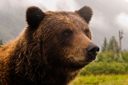

In [37]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [39]:
bear_types = "grizzly", "black", "teddy"
path = Path("bears")

In [40]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [44]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /opt/conda/lib/python3.7/site-packages/fastai/vision/utils.py
Type:      function


In [46]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [47]:
dls = bears.dataloaders(path)

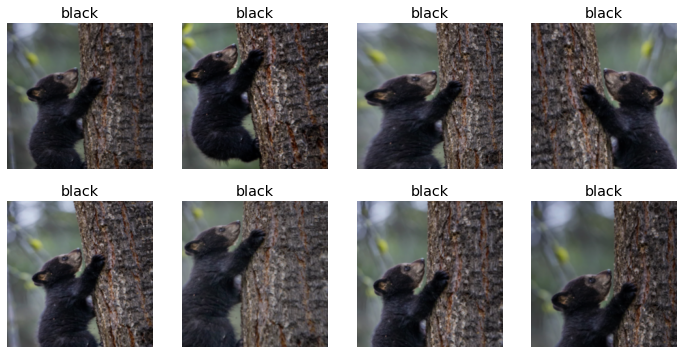

In [53]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = bears.dataloaders(path)


In [54]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


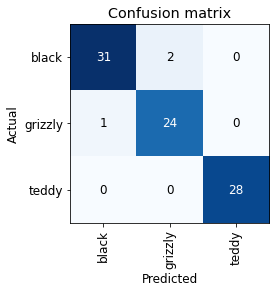

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

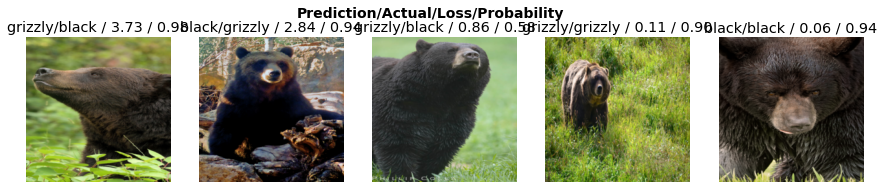

In [56]:
interp.plot_top_losses(5, nrows=1)

In [58]:
learn.export()

In [59]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [60]:
learn_inf = load_learner(path/"export.pkl")

In [61]:
learn_inf.predict("images/grizzly.jpg")

('grizzly', TensorBase(1), TensorBase([1.1846e-05, 9.9998e-01, 6.5369e-06]))

In [62]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [64]:
btn_upload = SimpleNamespace(data = ["images/grizzly.jpg"])

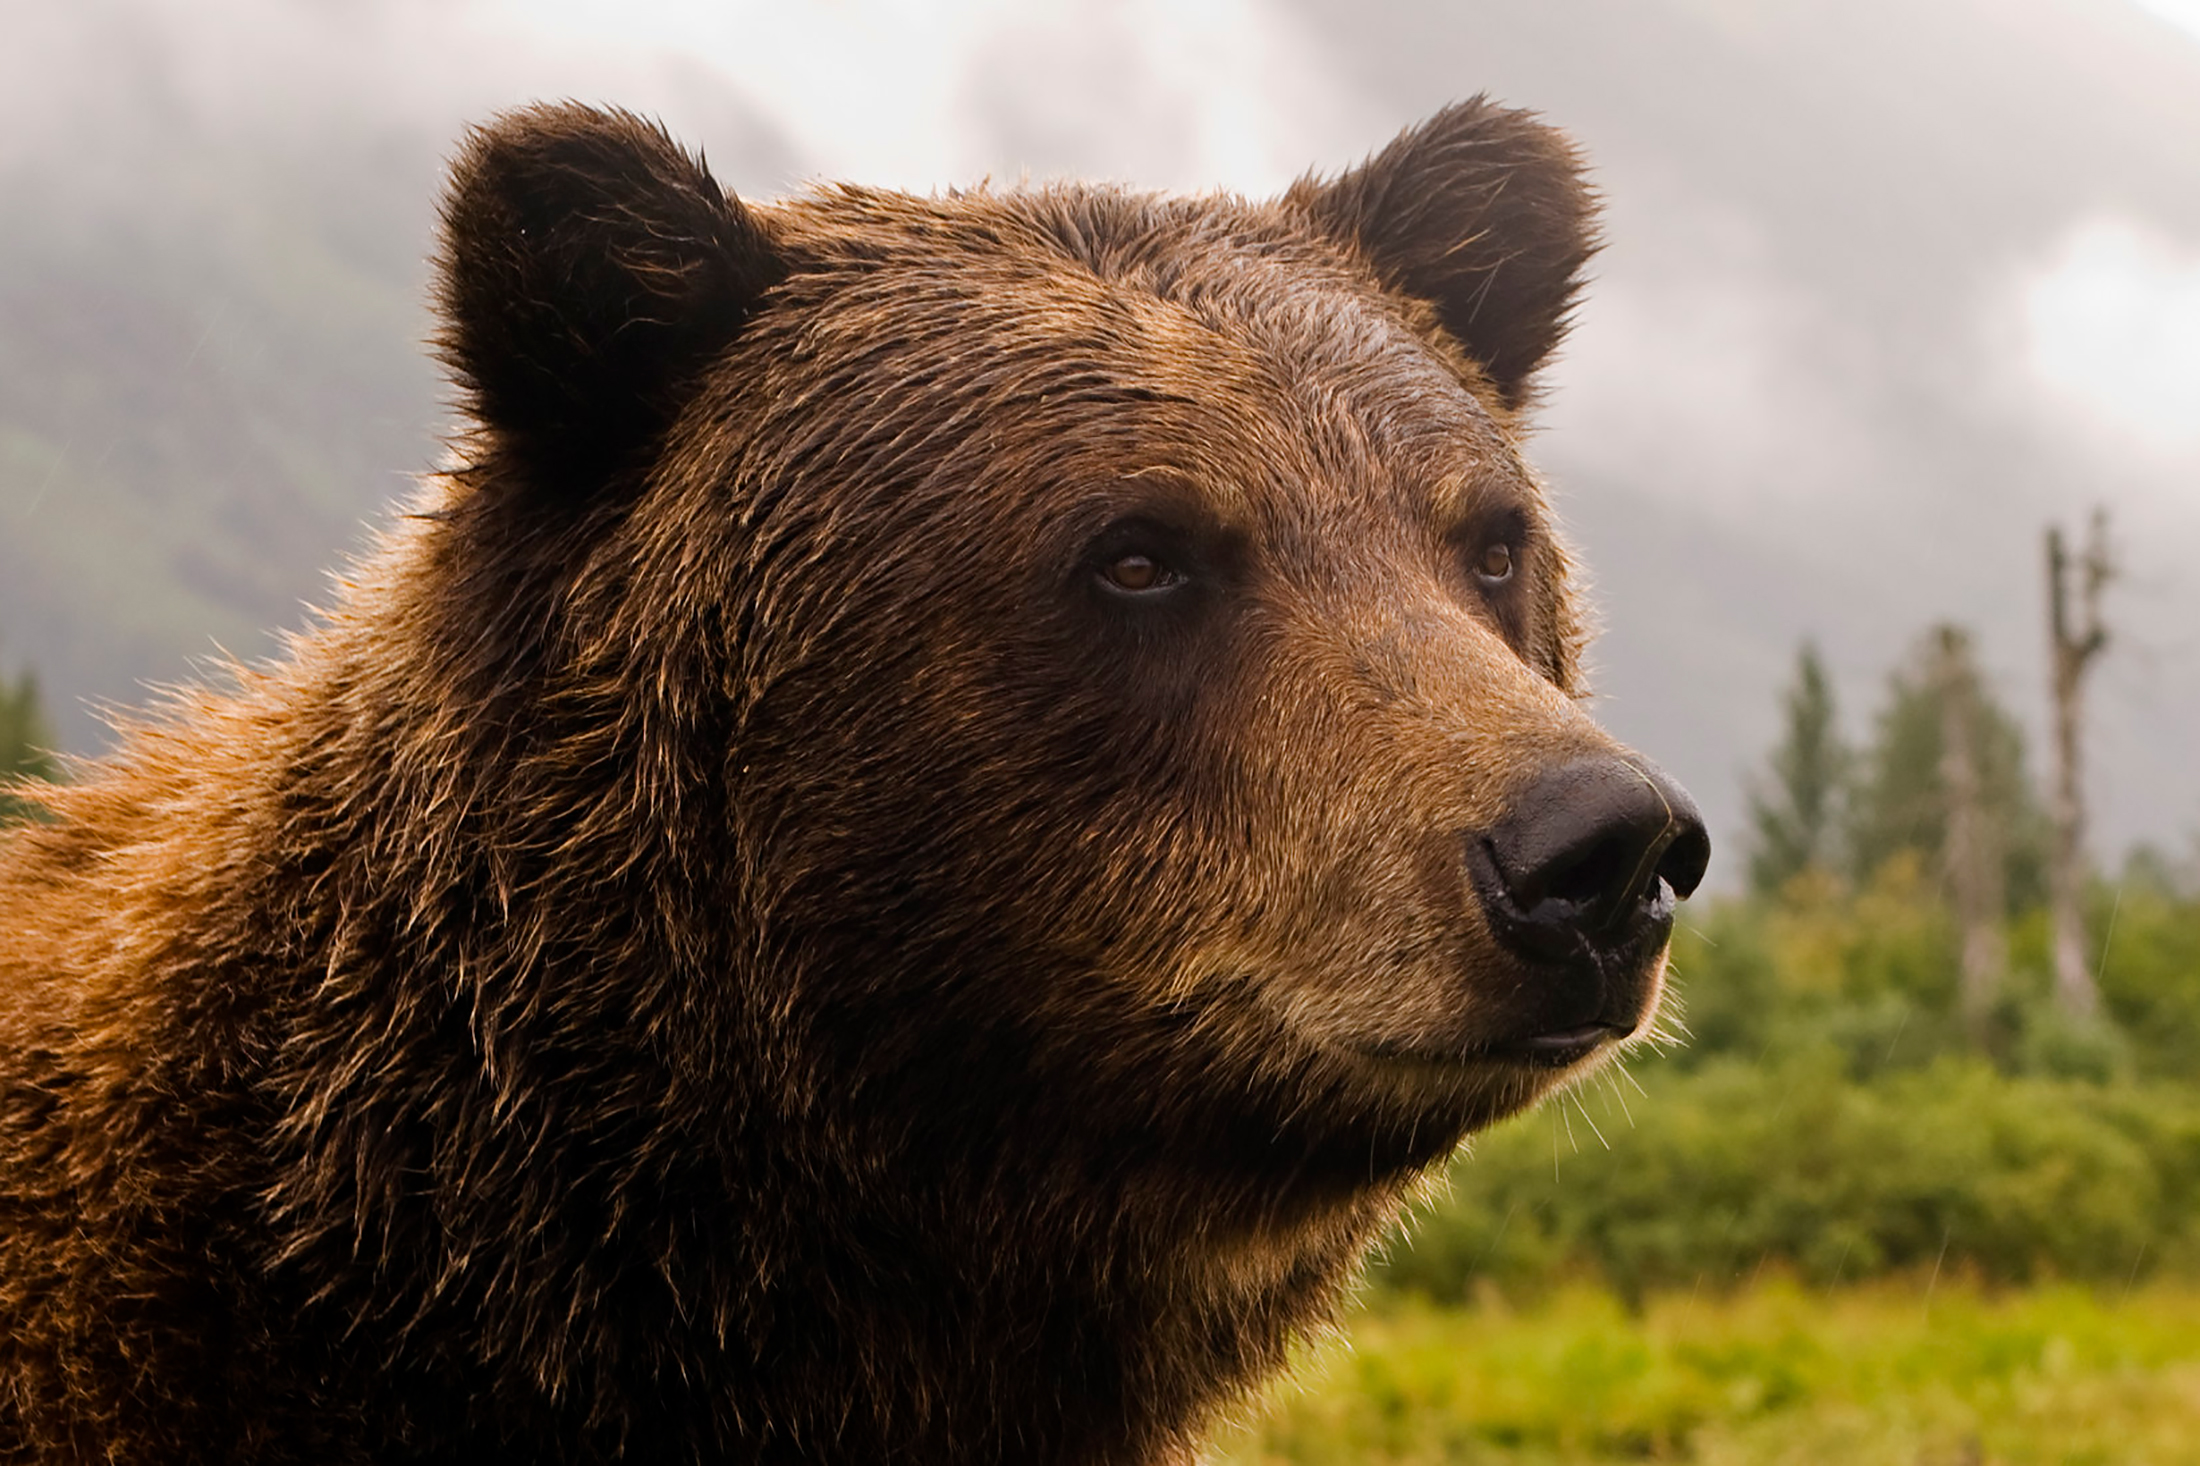

In [66]:
img = PILImage.create(btn_upload.data[-1])
img

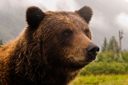

Output()

In [67]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

In [70]:
pred, pred_idx, probs = learn_inf.predict(img)
pred

'grizzly'

Label(value='Prediction: grizzly; Probability: 1.0000')